# IBM Code Day - Data Science - Hands-on
*Paso a paso*

En este *notebook* se describe el paso a paso del hands-on "Data Science de la A a la Z con IBM Watson Studio".

Este *notebook* puede ser descargado y subido como un *asset* en **Watson Studio**.

## Autor y licencia
Bruno González es Ingeniero en Computación, especializado en datos, y trabaja como *Lead Data Engineer* en <a href="http://www.idatha.com">IDATHA</a>.
<br><br>
**LinkedIn:** https://www.linkedin.com/in/brunogonzalezms<br>
**Twitter:** https://twitter.com/brunoo_gonzalez

Este *notebook* y el código que contiene está liberado bajo los términos de licencia de <a href="https://opensource.org/licenses/MIT">MIT License</a>.

## Tabla de contenidos
1. [Objetivo](#1.-Objetivo)
2. [Preparación del ambiente](#2.-Preparación-del-ambiente)<br>
    2.1. [Precondiciones](#2.1-Precondiciones)<br>
    2.2. [Creación del servicio Node-Red](#2.2-Creación-del-servicio-Node-Red)<br>
    2.3. [Creación de servicios](#2.3-Creación-de-servicios)<br>
    2.4. [Creación del proyecto](#2.4-Creación-del-proyecto)
3. [Adquisición de datos](#3.-Adquisición-de-datos)<br>
    3.1. [Configuración servicio Node-Red](#3.1-Configuración-servicio-Node-Red)<br>
    3.2. [Creación del flujo](#3.2-Creación-del-flujo)<br>
    3.3. [Verificación de flujo](#3.3-Verificación-de-flujo)
4. [Ingesta](#4.-Ingesta)<br>
    4.1. [Copia del notebook](#4.1-Copia-del-notebook)<br>
    4.2. [Ejecución del notebook](#4.2-Ejecución-del-notebook)
5. [Descubrimiento](#5.-Descubrimiento)<br>
    5.1 [Descarga archivos desde Object Storage](#5.1-Descarga-archivos-desde-Object-Storage)<br>
    5.2 [Carga de archivos como Assets](#5.2-Carga-de-archivos-como-Assets)<br>
    5.3 [Uso de Data Refinery](#5.3-Uso-de-Data-Refinery)
6. [Análisis y limpieza](#6.-Análisis-y-limpieza)<br>
    6.1. [Creación del notebook](#6.1-Creación-del-notebook)<br>
    6.2. [Carga de datos en notebook](#6.2-Carga-de-datos-en-notebook)<br>
    6.3. [Análisis y limpieza de datos](#6.3-Análisis-y-limpieza-de-datos)
7. [Transformación y enriquecimiento](#7.-Transformación-y-enriquecimiento)<br>
    7.1. [Enriquecimiento con Natural Language Understanding](#7.1-Enriquecimiento-con-Natural-Language-Understanding)
8. [Modelado y puesta en producción](#8.-Modelado-y-puesta-en-producción)
9. [Visualización](#9.-Visualización)

## 1. Objetivo

El objetivo principal de este hands-on es conocer Watson Studio como herramienta de procesamiento, análisis y generación de modelos de Machine Learning, utilizando diferentes servicios de IBM Cloud.

Trabajaremos en un caso práctico utilizando Twitter, NodeRed, Cloudant, Watson Studio y herramientas cognitivas de Watson, para extraer *insights* de opiniones de usuarios acerca de un tema.

## 2. Preparación del ambiente

### 2.1 Precondiciones
Para comenzar este hands-on se requiere:
1. Contar con una cuenta de Twitter y una aplicación creada en https://apps.twitter.com/.
2. Contar con una cuenta de [IBM Cloud](https://www.ibm.com/cloud/).
    - Se puede aplicar a un código de promoción enrolándose en *Cognitive Class*: https://cognitiveclass.ai/ibm-cloud-promotion/
3. Contar con una cuenta en [Watson Studio](http://datascience.ibm.com/).
    - Si la cuenta de IBM Cloud estaba inactiva, es mejor crear otra cuenta con un correo electrónico nuevo.
    - Si no se está registrado en Watson Studio, cliquear el botón *Sign Up* en la esquina superior derecha de https://datascience.ibm.com/.

Luego de completar el *Sign Up*, se debe ver una página como la siguiente:
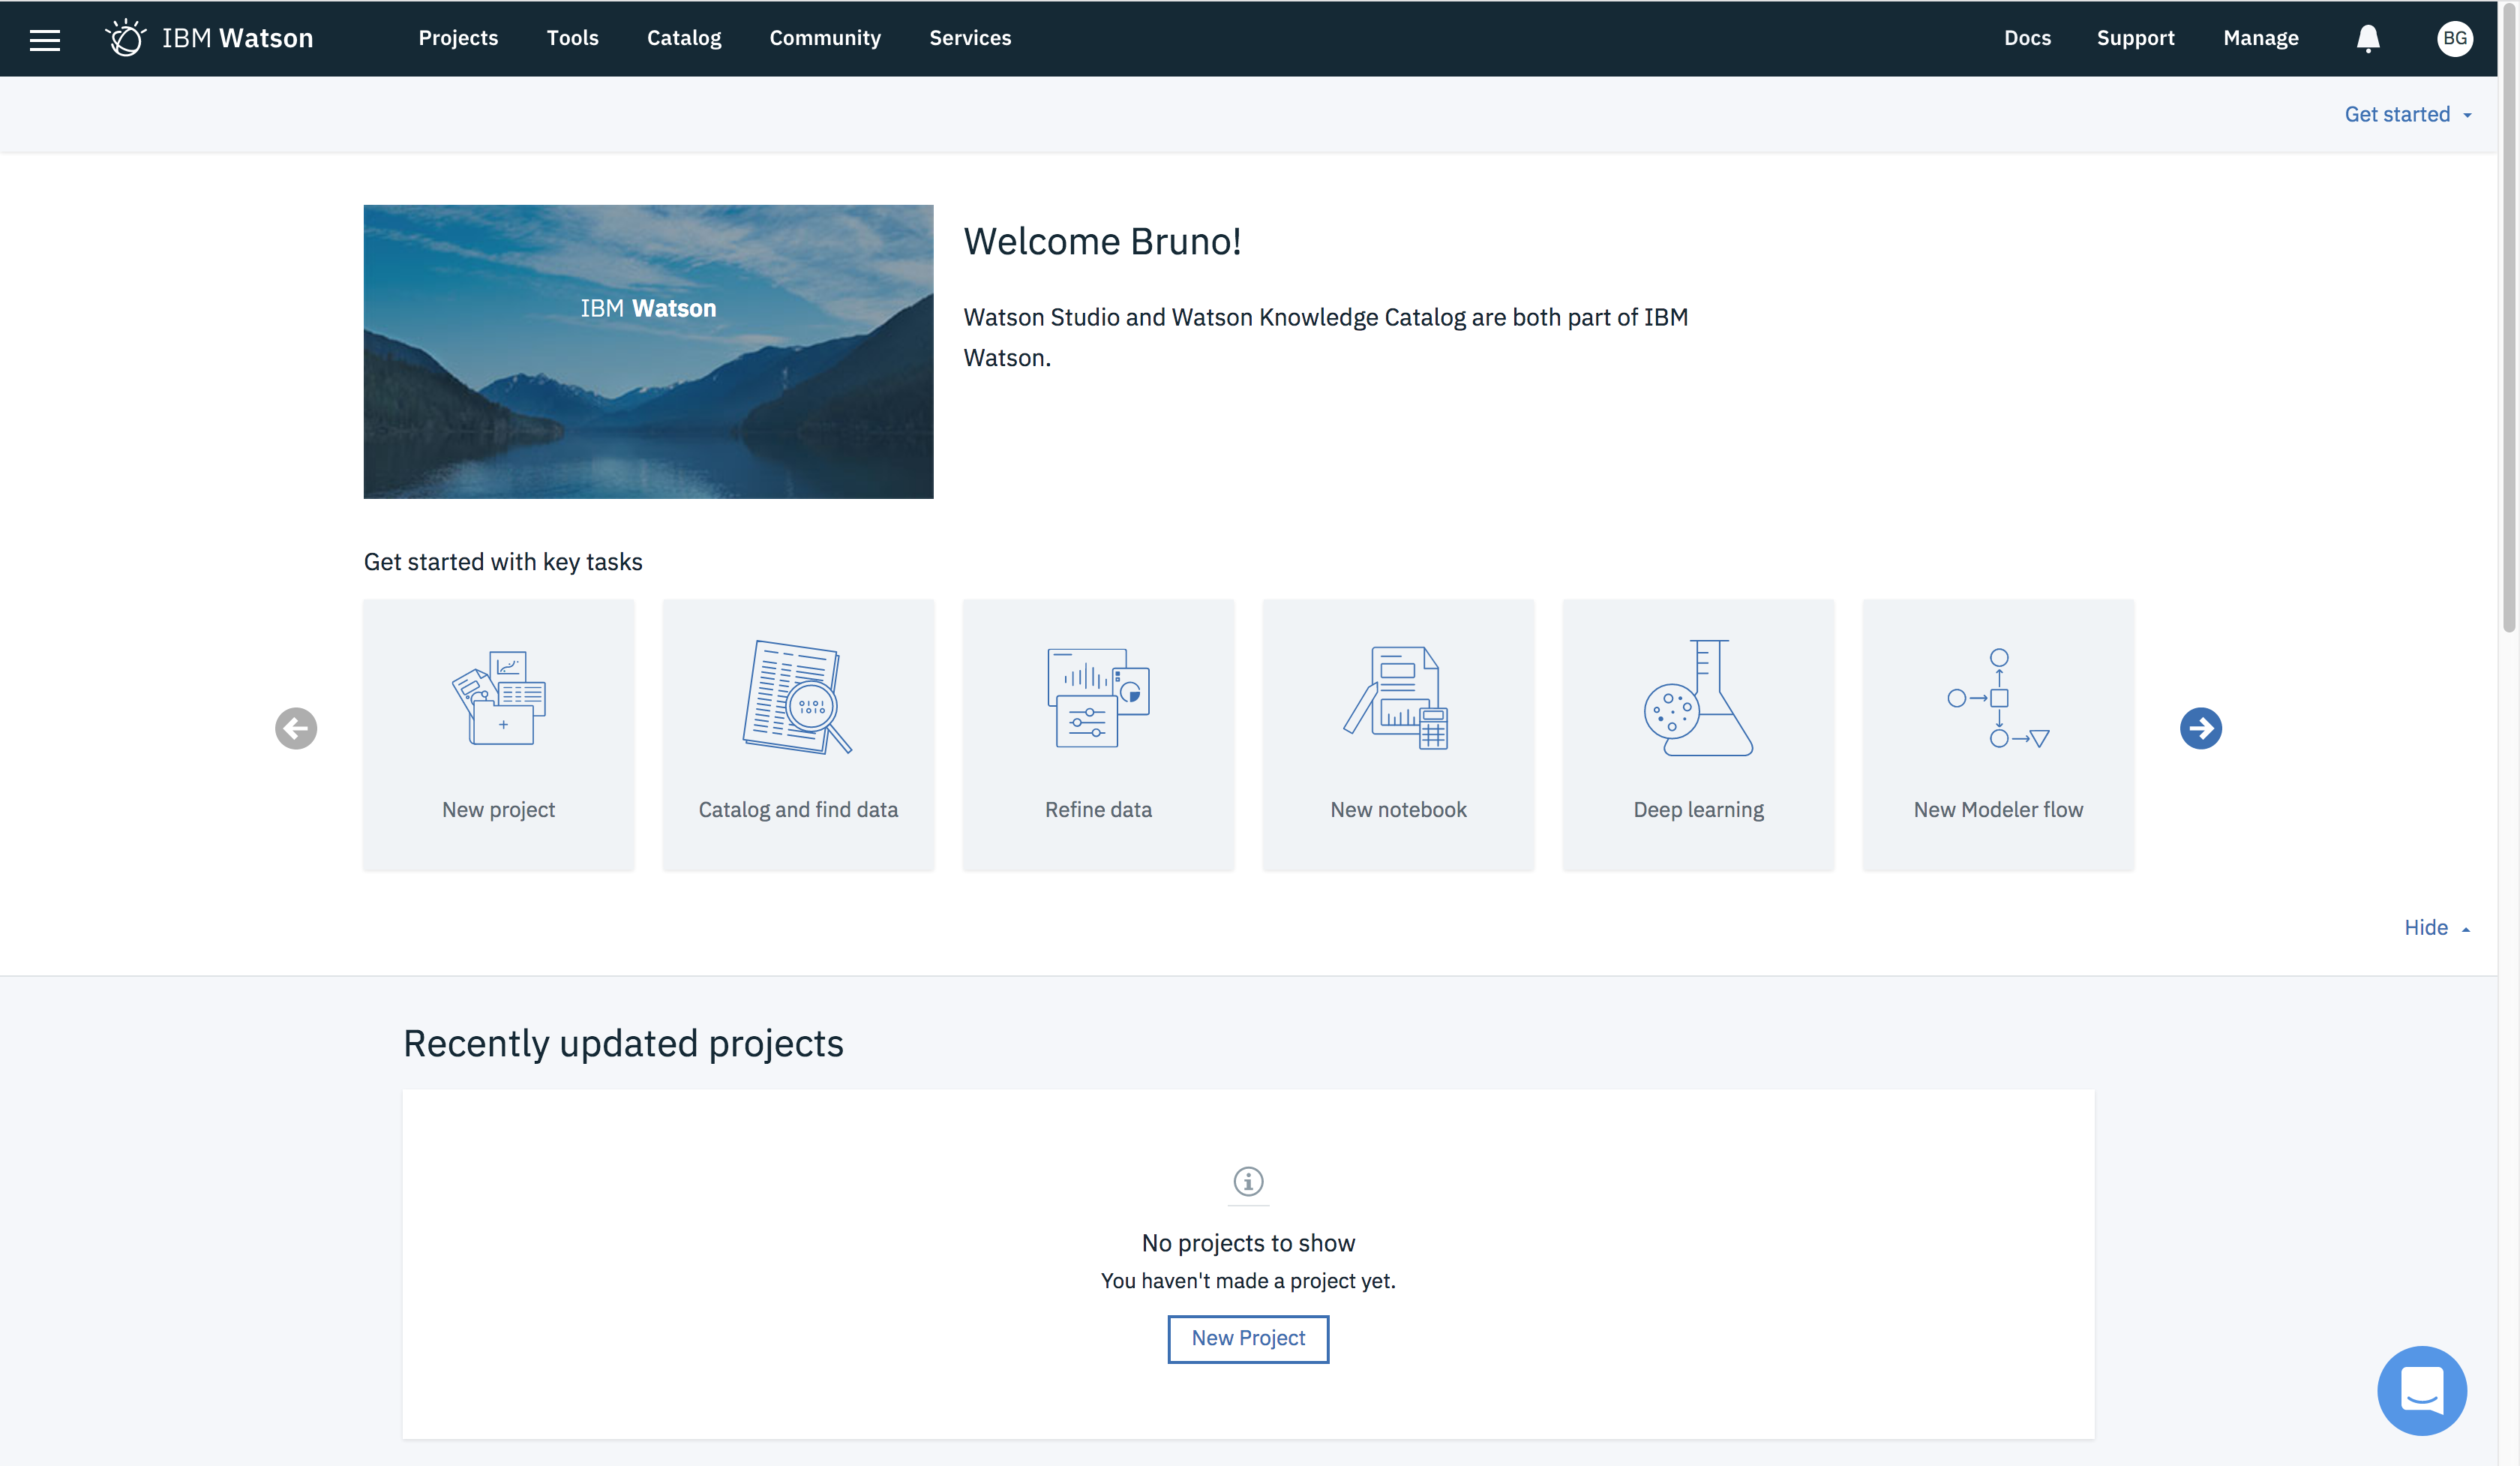

### 2.2 Creación del servicio Node-Red
1. Navegar a la URL https://console.bluemix.net/dashboard/apps/.
2. Cliquear el botón *Crear recurso* de la esquina superior derecha.
3. Utilizar la búsqueda con la palabra clave *node-red*.
4. Cliquear el servicio *Node-RED Starter*.
5. Especificar el nombre en el campo *Nombre de la app*.
6. Verificar que *Cloudant NoSQL DB* tenga seleccionado el plan *Lite*.
7. Cliquear el botón *Crear*.

### 2.3 Creación de servicios

#### Watson Services
1. En el menú *Services*, cliquear la opción *Watson Services*.
2. Cliquear el botón *Add service* de la esquina superior derecha.
3. Cliquear el botón *Add*, luego el botón *Create*, y para finalizar el botón *Confirm* de los servicios: *Machine Learning*, *Natural Language Understanding* y *Visual Recognition*.<br>
**Nota:** Para todos estos servicios elegir el plan *Lite*.
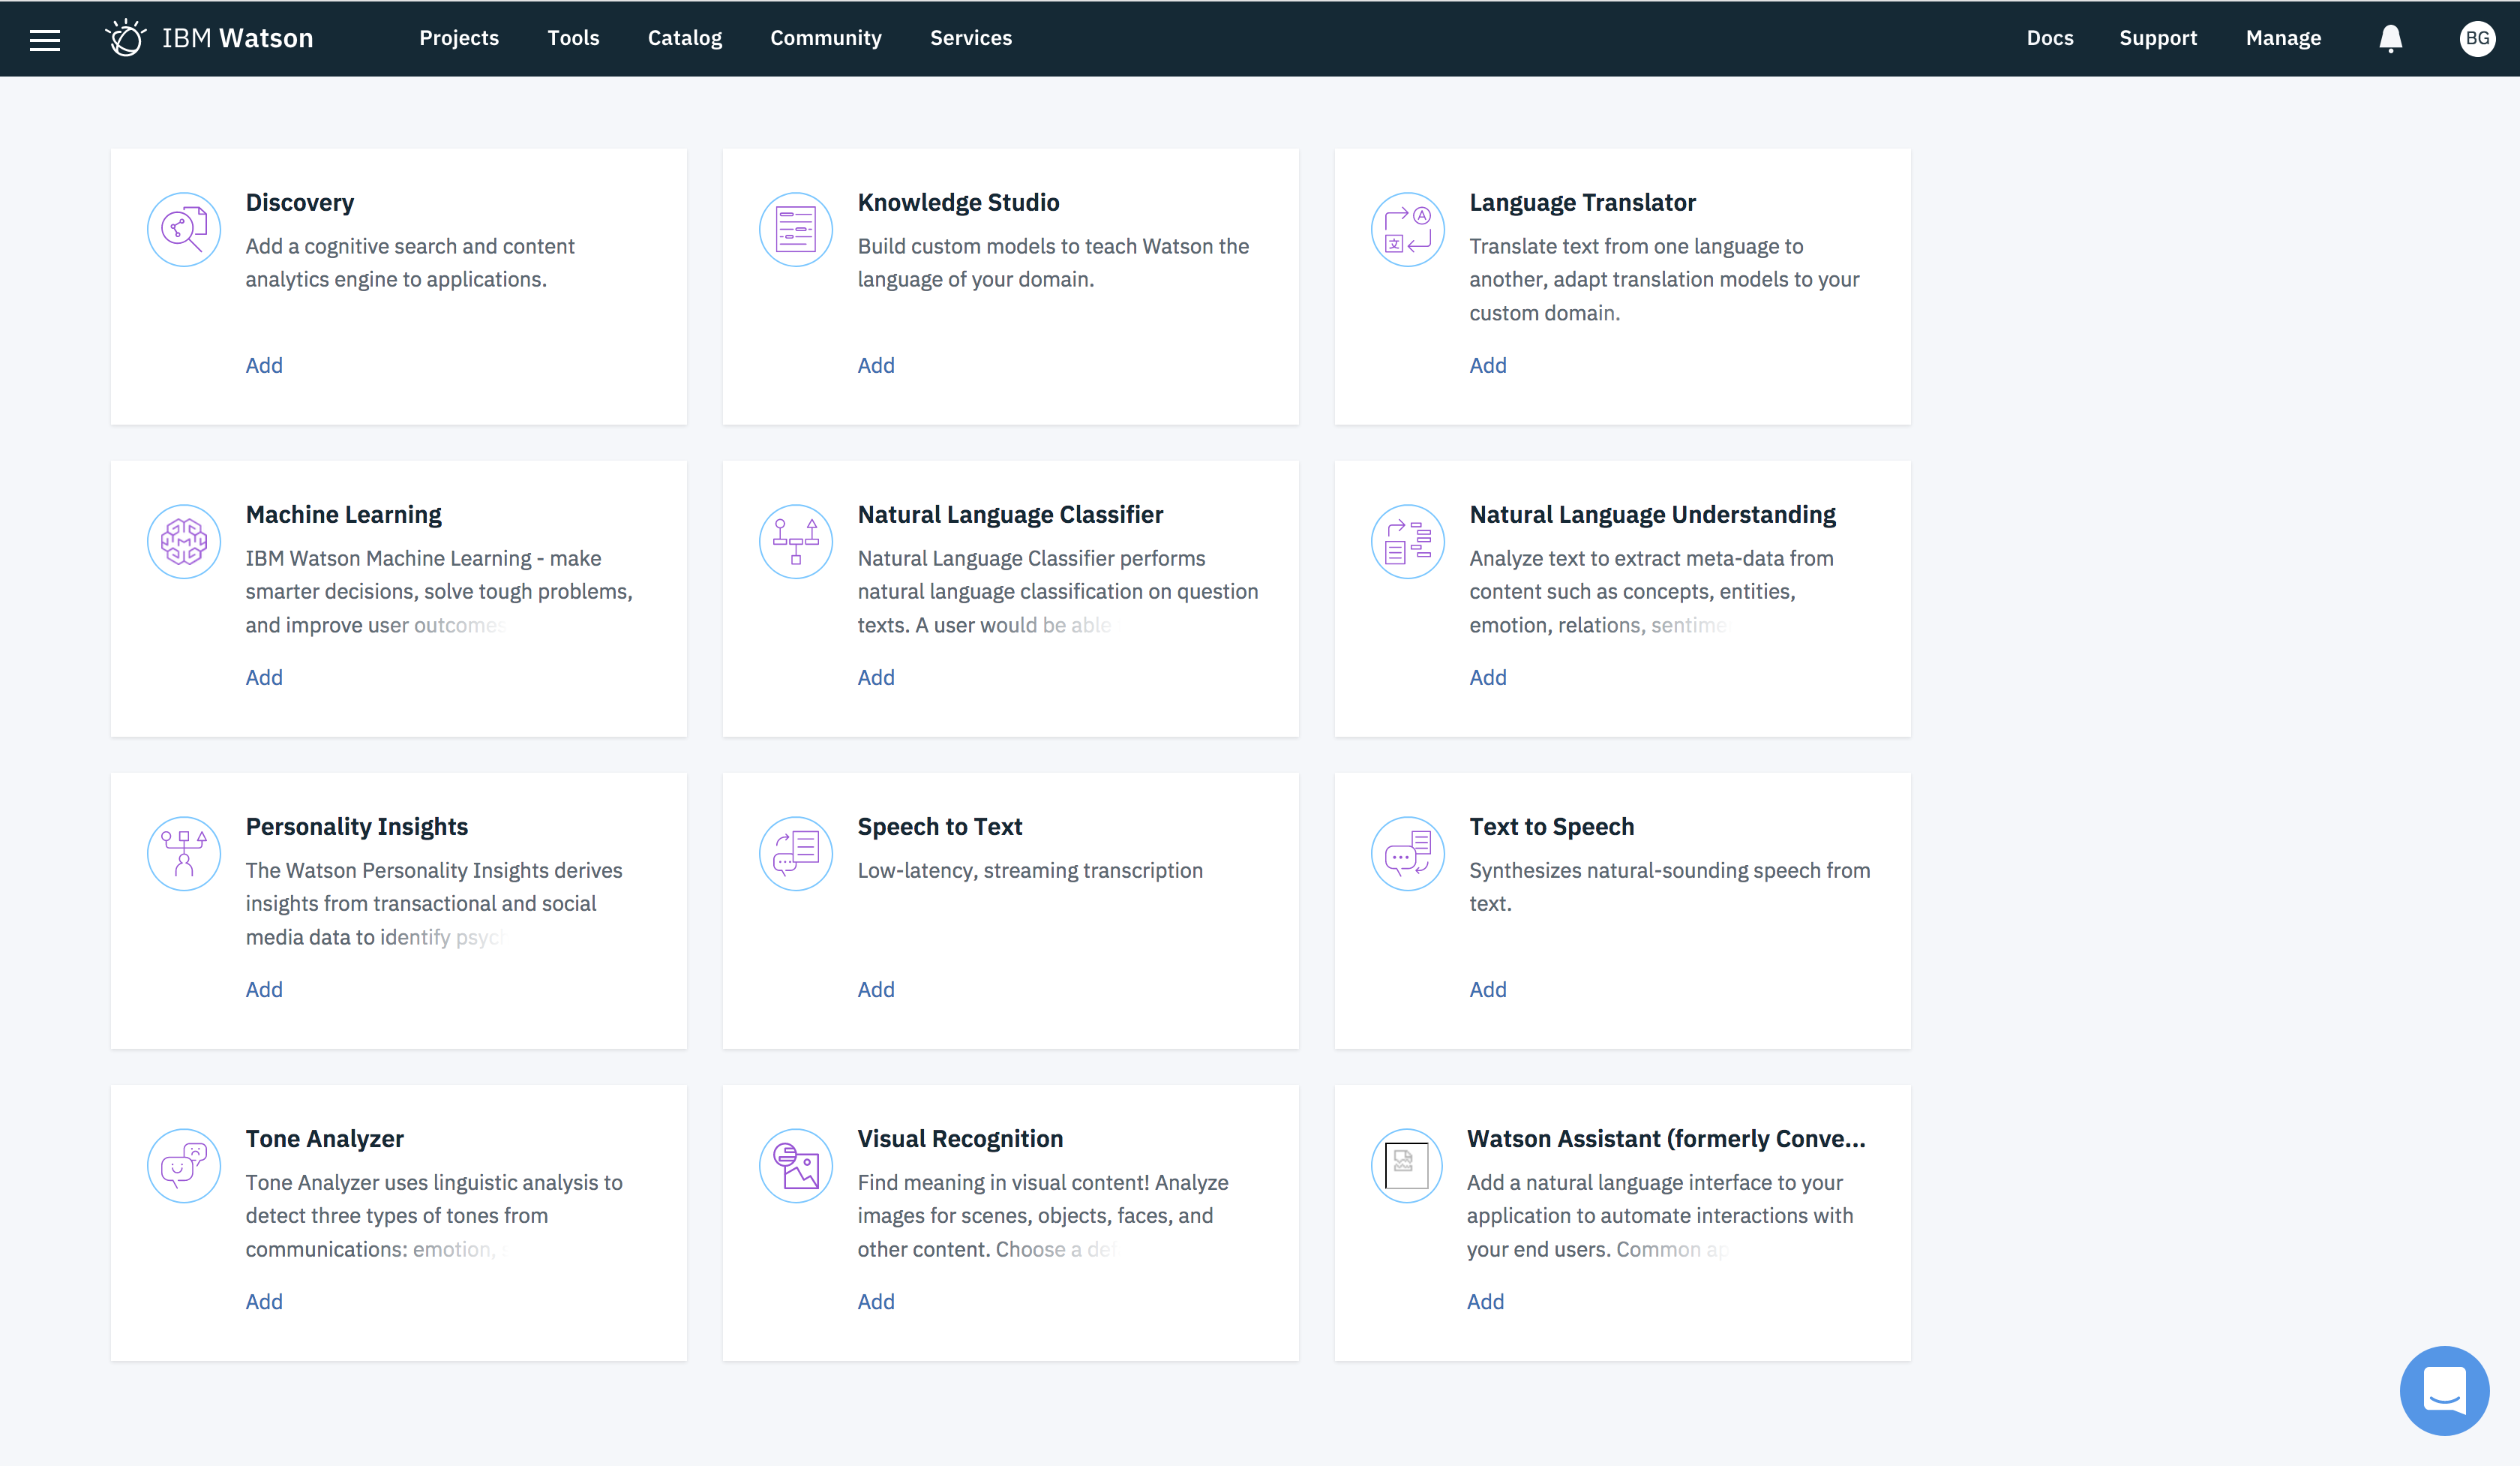

#### Compute Services
1. En el menú *Services*, cliquear la opción *Compute Services*.
2. Cliquear el botón *Add service* de la esquina superior derecha.
3. Cliquear el botón *Add*, luego el botón *Create*, y para finalizar el botón *Confirm* del servicio *IBM Cognos Dashboard Embedded* (elegir el plan *Lite*).

### 2.4 Creación del proyecto
#### Creación
1. En el menú *Projects*, cliquear la opción *View All Projects*.
2. Cliquear el botón *New* de la esquina superior derecha.
3. Especificar un nombre en el campo *Name*.
4. Si no está creada, crear un *storage* haciendo clic en el botón *Add* que se encuentra a la derecha, bajo el título *Define storage* (especificar plan *Lite* para el *Cloud Object Storage* a crear).
5. Una vez creado el *Cloud Object Storage*, cliquear el botón *Refresh*.
6. Dejar seleccionada la opción *Restrict who can be a collaborator*.
7. Cliquear el botón *Create* para crear el proyecto.

#### Configuración
1. Una vez creado el proyecto, dirigirse a la solapa *Settings*.
2. Navegar hasta el título *Associated services*.
3. Cliquear el botón *Add service* y luego cliquear la opción *Spark*.
    1. En la solapa *New*, seleccionar la opción *Lite*.
    2. Cliquar el botón *Create* y luego *Confirm*.
5. Cliquear nuevamente el botón *Add service* y luego cliquear la opción *Dashboard*.
    1. En la solapa *Existing*, desplegar la lista *Existing Service Instance*.
    2. Seleccionar el servicio creado en [Compute Services](#Compute-Services).
    3. Cliquear el botón *Select*.
6. Cliquear nuevamente el botón *Add service* y luego cliquear la opción *Watson*.
    1. Cliquear el botón *Add* del servicio *Visual Recognition*.
    2. En la solapa *Existing*, desplegar la lista *Existing Service Instance*.
    3. Seleccionar el servicio creado en [Watson Services](#Watson-Services).
    4. Cliquear el botón *Select*.

## 3. Adquisición de datos

### 3.1 Configuración servicio Node-Red
1. Ingresar al *dashboard* de IBM Cloud: https://console.bluemix.net/dashboard/apps/.
2. Seleccionar aplicación creada en [Creación del servicio Node-Red](#2.2-Creación-del-servicio-Node-Red).
3. Cliquear en *Visitar URL de app*.
4. Cliquear el botón *Next*.
5. Especificar *Username* y *Password* y cliquear el botón *Next*.<br>
**Importante:** anotar el usuario y contraseña para ser utilizados en el paso 8.
6. Cliquear el botón *Next* y luego el botón *Finish*.
7. Una vez terminada la configuración, cliquear el botón *Go to your Node-RED flow editor*.
8. Especificar *Username* y *Password* y cliquear el botón *Login*.

### 3.2 Creación del flujo
Una vez dentro de la aplicación de Node-Red:
1. Nodo Twitter:
    1. Utilizar el cuadro de búsqueda de la esquina superior izquierda.
    2. Ingresar el criterio de búsqueda *twitter*.
    3. Seleccionar y arrastrar al flujo el nodo *Twitter in* (el que tiene el logo de Twitter a la izquierda).
    4. Hacer doble clic sobre el nodo.
    5. Hacer clic en el botón del lápiz del campo *Twitter ID*.
    6. Completar las credenciales con las credenciales de la app de Twitter, especificadas en la solapa *Keys and Access Tokens* dentro de la configuración de la aplicación (https://apps.twitter.com).
    7. En el campo *Search*, seleccionar la opción *all public tweets*.
    8. En el campo *for*, especificar el criterio de búsqueda: **ibmcodemvd**.
    9. Cliquear el botón *Done*.
2. Nodo Cloudant:
    1. Utilizar el cuadro de búsqueda de la esquina superior izquierda.
    2. Ingresar el criterio de búsqueda *cloudant*.
    3. Seleccionar y arrastrar al flujo el nodo *Cloudant out* (el que tiene el logo de Cloudant a la derecha).
    4. Hacer doble clic sobre el nodo.
    5. En el campo *Database*, especificar el nombre de la base de datos: **tweets**.
    6. Cliquear el botón *Done*.
3. Partiendo desde la conexión del nodo *Twitter in*, crear una conexión hacia el nodo *Cloudant out*.<br>
Debería quedar similar a la siguiente imagen:
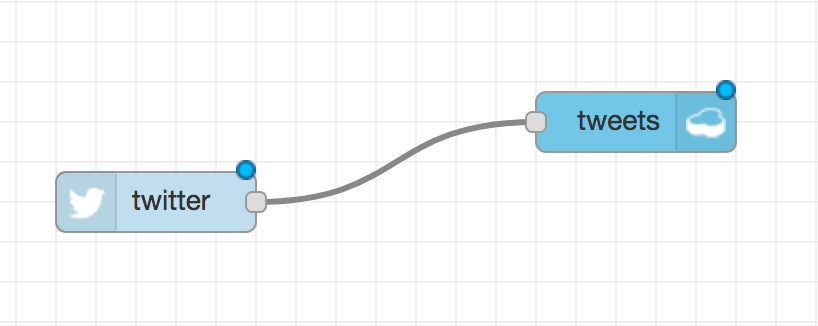
4. Cliquear el botón *Deploy* de la esquina superior derecha.

### 3.3 Verificación de flujo
1. Ingresar al *dashboard* de IBM Cloud: https://console.bluemix.net/dashboard/apps/.
2. Bajo el título *Servicios de Cloud Foundry*, seleccionar el servicio de *Cloudant*.
3. Cliquear el botón *Launch Cloudant Dashboard*.
4. Cliquear en el menú *Databases*.
5. Verificar que la base de datos **tweets** está creada y tiene documentos.<br>
**Nota:** En caso de no tener documentos, probar twitteando con el hashtag #IBMCodeMVD.

## 4. Ingesta

### 4.1 Copia del notebook
1. Acceder a la URL del [notebook de ejemplo](https://dataplatform.ibm.com/analytics/notebooks/v2/79791822-7da9-4814-b655-391aec34b48f/view?access_token=bd640bbb524d2b52fe40d4a5ba2e233a22c66ef46f4b043001058585afc31998).
2. Descargar el notebook haciendo clic en el botón de descarga de la esquina superior derecha.
3. En el menú *Projects*, cliquear la opción del proyecto creado en [Creación del proyecto](#2.4-Creación-del-proyecto).
4. Cliquear en la solapa *Assets*, y a la derecha del título *Notebooks*, cliquear el botón *New notebook*.
5. Cliquear en la opción *From file*.
6. Cliquear en *Examinar* en el campo *Notebook file*.
7. Especificar el nombre en el campo *Name*.
8. Seleccionar el servicio de Spark creado en [Configuración](#Configuración) en el campo *Select runtime*.
9. Cliquear el botón *Create Notebook*.

### 4.2 Ejecución del notebook
1. En el menú *Projects*, cliquear la opción del proyecto creado en [Creación del proyecto](#2.4-Creación-del-proyecto).
2. Cliquear el botón *Add to project* de la esquina superior derecha, y seleccionar la opción *Connection*
3. Bajo el título *Your service instances in IBM Cloud*, seleccionar la instancia de *Cloudant* creada junto con *Node-Red*.
4. Cliquear el botón *Create*.
5. Ingresar al notebook creado en [Creación del notebook](#4.1-Creación-del-notebook).
6. En la tercera celda de código, que tiene un comentario que dice: `The code was removed by DSX for sharing.`, ingresar las credenciales de *Cloudant*.
    1. Hacer doble clic sobre la celda y borrar el comentario.
    2. Seleccionar la opción *Data* dentro del notebook (botón con 1 y 0 en la esquina superior derecha del notebook).
    3. Ingresar a la solapa *Connections*.
    4. Cliquear el botón *Insert to code* del servicio de *Cloudant*.
    5. Modificar el nombre de la variable creada para que tenga el nombre `credentials_1`.
    6. Guardar el notebook utilizando el menú *File*, opción *Save*.
7. Ejecutar la primera celda de código que comienza con `import pixiedust` (la celda se ejecuta utilizando el botón *Run* de la barra de herramientas).
8. Reiniciar el notebook utilizando el menú *Kernel*, opción *Restart* (confirmar el reinicio).
9. En la primera celda de código, luego del título *Subida de datos a Object Storage*, que tiene un comentario que dice: `The code was removed by DSX for sharing.`, ingresar las credenciales de *Cloud Object Storage*.
    1. Hacer doble clic sobre la celda y borrar el comentario.
    2. Ingresar al *dashboard* de IBM Cloud: https://console.bluemix.net/dashboard/apps/.
    3. Bajo el título *Servicios*, cliquear el servicio de *Cloud Object Storage* creado con el proyecto de Watson Studio.
    4. Cliquear el menú *Service credentials*.
    5. Copiar todo el JSON de la credencial que corresponde al *Admin*.
    6. Pegar el código del JSON en la celda borrada y asignarlo a una variable de nombre `cos_credentials`.
    7. Cliquear el menú *Buckets*.
    8. Copiar el nombre del único bucket que aparece.
    8. En la tercera celda de código, luego del título *Subida de datos a Object Storage*, modificar el tercer parámetro de la función `upload_file_cos` con el nombre correspondiente al bucket del *Cloud Object Storage* (recién copiado).
10. Ejecutar todas las celdas utilizando el menú *Cell*, opción *Run All*.

## 5. Descubrimiento

### 5.1 Descarga archivos desde Object Storage
1. Ingresar al *dashboard* de IBM Cloud: https://console.bluemix.net/dashboard/apps/.
2. Bajo el título *Servicios*, cliquear el servicio de *Cloud Object Storage* creado con el proyecto de Watson Studio.
3. Cliquear en el menú *Buckets*.
4. Cliquear el nombre del único bucket que aparece.
5. Buscar los objetos guardados por el notebook (archivos CSV) y descargarlos.

### 5.2 Carga de archivos como Assets
1. En el menú *Projects*, cliquear la opción del proyecto creado en [Creación del proyecto](#2.4-Creación-del-proyecto).
2. Cliquear en la solapa *Assets*, y a la derecha del título *Data assets*, cliquear el botón *New data asset*.
3. Seleccionar solapa *Files*.
4. Seleccionar todos los archivos CSV cargados en el *Cloud Object Storage*, cliquear en los tres puntos verticales y seleccionar la opción *Add as data asset*.

### 5.3 Uso de Data Refinery
1. En el menú *Projects*, cliquear la opción del proyecto creado en [Creación del proyecto](#2.4-Creación-del-proyecto).
2. Cliquear en la solapa *Assets*, y a la derecha del título *Data flows*, cliquear el botón *New data flow*.
3. Seleccionar archivo *user_data.csv*.
4. Cliquear el botón *Add*.
5. **Demostración en vivo**.

## 6. Análisis y limpieza

### 6.1 Creación del notebook
1. En el menú *Projects*, cliquear la opción del proyecto creado en [Creación del proyecto](#2.4-Creación-del-proyecto).
2. Cliquear en la solapa *Assets*, y a la derecha del título *Notebooks*, cliquear el botón *New notebook*.
3. Cliquear en la opción *Blank*.
4. Especificar el nombre en el campo *Name*.
5. Seleccionar el servicio de Spark creado en [Configuración](#Configuración) en el campo *Select runtime*.
6. Cliquear el botón *Create Notebook*.

### 6.2 Carga de datos en notebook
1. Seleccionar la opción *Data* dentro del notebook (botón con 1 y 0 en la esquina superior derecha del notebook).
2. En la solapa *Files*, cliquear el botón *Insert to code*, opción *Insert pandas DataFrame* del archivo *tweets_data.csv*.
3. Ejecutar la celda de código pegada (la celda se ejecuta utilizando el botón *Run* de la barra de herramientas).

### 6.3 Análisis y limpieza de datos
Demostración en vivo utilizando *pandas* y *Spark*.

## 7. Transformación y enriquecimiento

### 7.1 Enriquecimiento con Natural Language Understanding
1. Agregar una nueva celda al notebook, pegar y ejecutar el siguiente comando: `!pip install --upgrade watson-developer-cloud`.
2. Ingresar al *dashboard* de IBM Cloud: https://console.bluemix.net/dashboard/apps/.
3. Seleccionar el servicio de *Natural Language Understanding*.
3. Cliquear el menú *Service credentials*.
4. Cliquear el botón *View credentials* de las credenciales creadas y copiar el JSON con los datos de acceso.
5. Pegar el código del JSON en una celda nueva y asignarlo a una variable de nombre `nlu_cred`.
6. Ingresar a la [documentación Natural Language Understanding](https://www.ibm.com/watson/developercloud/natural-language-understanding/api/v1/?python#api-explorer).
7. Seleccionar el lenguaje de programación *Python*, copiar el *Example request* y hacerlo funcionar.
8. Copiar la siguiente función para aplicar a la columna `tweet_text`. **Demostración en vivo**.

In [ ]:
import json
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 \
  import Features, EntitiesOptions, KeywordsOptions, SentimentOptions

natural_language_understanding = NaturalLanguageUnderstandingV1(
  username=nlu['username'],
  password=nlu['password'],
  version='2018-03-16')

def get_sentiment(tweet_text):
    try:
        response = natural_language_understanding.analyze(
            text=tweet_text,
            features=Features(
                sentiment=SentimentOptions()
            )
        )
        return response['sentiment']['document']['label']
    except Exception:
        print(tweet_text)
        return ''

## 8. Modelado y puesta en producción

¿Obtendré buenos resultados si quiero predecir cuántas personas me van a seguir en Twitter? *No*.

Demostración de uso de **Watson Machine Learning**.

## 9. Visualización

1. En el menú *Projects*, cliquear la opción del proyecto creado en [Creación del proyecto](#2.4-Creación-del-proyecto).
2. Cliquear en la solapa *Assets*, y a la derecha del título *Dashboards*, cliquear el botón *New dashboard*.
3. **Demostración en vivo**.